Enter gender (Male/Female): Male
Enter SeniorCitizen (0/1): 0
Enter Partner (Yes/No): Yes
Enter Dependents (Yes/No): Yes
Enter tenure (months): 6
Enter PhoneService (Yes/No): Yes
Enter MultipleLines (Yes/No/No phone service): Yes
Enter InternetService (DSL/Fiber optic/No): DSL
Enter OnlineSecurity (Yes/No/No internet service): Yes
Enter OnlineBackup (Yes/No/No internet service): Yes
Enter DeviceProtection (Yes/No/No internet service): Yes
Enter TechSupport (Yes/No/No internet service): Yes
Enter StreamingTV (Yes/No/No internet service): Yes
Enter StreamingMovies (Yes/No/No internet service): Yes
Enter Contract (Month-to-month/One year/Two year): One year
Enter PaperlessBilling (Yes/No): Yes
Enter PaymentMethod (Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic)): Credit card
Enter MonthlyCharges: 36.66
Enter TotalCharges: 36.66
The customer is predicted to churn.


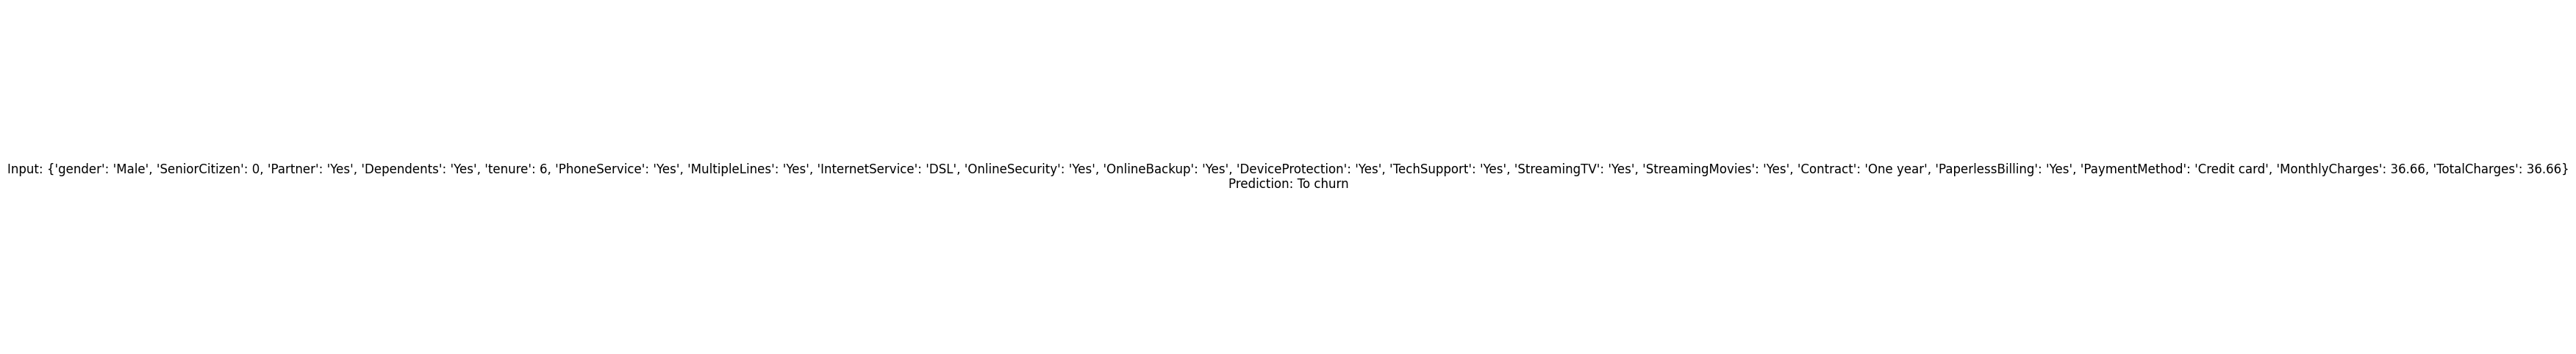

In [2]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
final_model = joblib.load('/content/drive/MyDrive/MINI PROJECT/Model/churn_prediction_model_knn.pkl')
customer_features = {
    'gender': input('Enter gender (Male/Female): '),
    'SeniorCitizen': int(input('Enter SeniorCitizen (0/1): ')),
    'Partner': input('Enter Partner (Yes/No): '),
    'Dependents': input('Enter Dependents (Yes/No): '),
    'tenure': int(input('Enter tenure (months): ')),
    'PhoneService': input('Enter PhoneService (Yes/No): '),
    'MultipleLines': input('Enter MultipleLines (Yes/No/No phone service): '),
    'InternetService': input('Enter InternetService (DSL/Fiber optic/No): '),
    'OnlineSecurity': input('Enter OnlineSecurity (Yes/No/No internet service): '),
    'OnlineBackup': input('Enter OnlineBackup (Yes/No/No internet service): '),
    'DeviceProtection': input('Enter DeviceProtection (Yes/No/No internet service): '),
    'TechSupport': input('Enter TechSupport (Yes/No/No internet service): '),
    'StreamingTV': input('Enter StreamingTV (Yes/No/No internet service): '),
    'StreamingMovies': input('Enter StreamingMovies (Yes/No/No internet service): '),
    'Contract': input('Enter Contract (Month-to-month/One year/Two year): '),
    'PaperlessBilling': input('Enter PaperlessBilling (Yes/No): '),
    'PaymentMethod': input('Enter PaymentMethod (Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic)): '),
    'MonthlyCharges': float(input('Enter MonthlyCharges: ')),
    'TotalCharges': float(input('Enter TotalCharges: '))
}
customer_df = pd.DataFrame(customer_features, index=[0])
label_encoder = LabelEncoder()
for col in customer_df.columns:
    if customer_df[col].dtype == 'object':
        customer_df[col] = label_encoder.fit_transform(customer_df[col])
prediction = final_model.predict(customer_df)
if prediction[0] == 0:
    print("The customer is predicted not to churn.")
else:
    print("The customer is predicted to churn.")
plt.figure(figsize=(8, 6))
plt.text(0.5, 0.5, f'Input: {customer_features}\nPrediction: {"Not to churn" if prediction[0] == 0 else "To churn"}', ha='center', va='center', fontsize=12)
plt.axis('off')
plt.savefig('customer_churn_prediction_result.svg', format='svg')